# Analysis - Core algorithm

Analysis of the core algorithm based on Bitcoin core

In [2]:
%pylab inline
import pandas as pd
import numpy as np

from matplotlib import rc
rc('font', family='sans-serif')
rc('font', size=10.0)
rc('text', usetex=False)

from matplotlib.font_manager import FontProperties
panel_label_font = FontProperties().copy()
panel_label_font.set_weight("bold")
panel_label_font.set_size(12.0)
panel_label_font.set_family("sans-serif")

Populating the interactive namespace from numpy and matplotlib


In [3]:
def preprocess(df):
    df = df.replace(-1.00, np.nan)
    df = df.sort_values(by=['block_number'])
    return df

dfcore = pd.read_csv('data/feeestimation/corescores2019-01-11.csv')
dfcore = preprocess(dfcore)

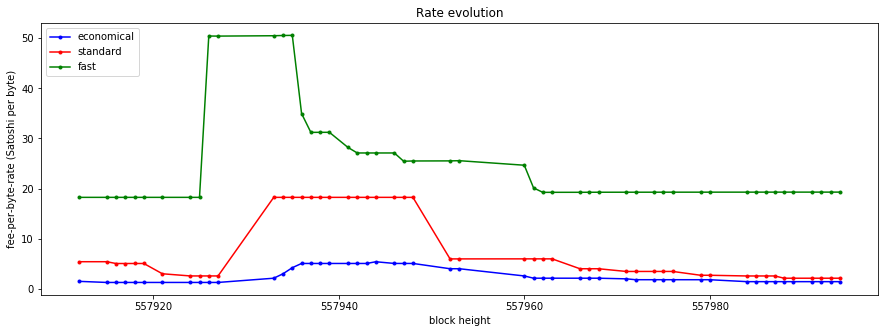

In [5]:
import matplotlib.pyplot as plt

x = dfcore["block_number"].values
y1 = dfcore["priceEconomical"].values
y2 = dfcore["priceStandard"].values
y3 = dfcore["priceFast"].values

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)

ax.plot(x,y1, c='b', marker='.', label='economical')
ax.plot(x,y2, c='r', marker='.', label='standard')
ax.plot(x,y3, c='g',marker='.', label='fast')

plt.xlabel('block height')
ax.ticklabel_format(useOffset=False)
plt.ylabel('fee-per-byte-rate (Satoshi per byte)')
plt.title('Rate evolution')
plt.legend(loc=2)

In [9]:
def getPercentage(cols):
    minScore = dfcore[cols].min(axis=1)
    numberOfBlocks = minScore.count()
    numberOfBlocksWithoutInclusion = minScore.value_counts().get(100.000, None)
    if numberOfBlocksWithoutInclusion is None:
        numberOfBlocksWithoutInclusion = 0
    percentage = (100 / numberOfBlocks) * numberOfBlocksWithoutInclusion
    print(percentage)
    return percentage

11.11111111111111
8.333333333333332
0.0
4.878048780487805
4.878048780487805
0.0
4.3478260869565215
4.3478260869565215
0.0
4.166666666666667
4.166666666666667
0.0
4.166666666666667
4.166666666666667
0.0
4.081632653061225
4.081632653061225
0.0
2.0
2.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


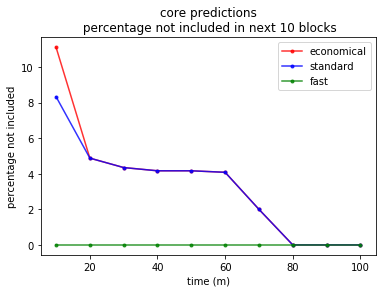

In [12]:
x1 = []
y1 = []
y2 = []
y3 = []
avg_blocktime = 10
colsSlow = []
colsStd = []
colsFast = []
for idx in range(1, 11, 1):
    colsSlow.append("scoreEconomicalPlus" + str(idx))
    colsStd.append("scoreStandardPlus" + str(idx))
    colsFast.append("scoreFastPlus" + str(idx))
    percentage1 = getPercentage(colsSlow)
    y1.append(percentage1)
    percentage2 = getPercentage(colsStd)
    y2.append(percentage2)
    percentage3 = getPercentage(colsFast)
    y3.append(percentage3)
    x1.append(idx * avg_blocktime)

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(x1, y1, alpha=0.8, c='r', marker='.', label='economical')
ax.plot(x1, y2, alpha=0.8, c='b', marker='.', label='standard')
ax.plot(x1, y3, alpha=0.8, c='g', marker='.', label='fast')
#plt.axvline(x=60.0, color='g', linestyle='--')

plt.xlabel('time (m)')
plt.ylabel('percentage not included')
plt.title('core predictions\n percentage not included in next 10 blocks')
plt.legend(loc=1)